In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import datetime
#sns.set(color_codes=True)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import statistics as st
sns.set_style('whitegrid', {'axes.linewidth' : 0.5})
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import gc
import statsmodels.api as sm

In [2]:
df = pd.read_csv('all_cause_deaths_over_time.csv')

In [3]:
df = df[(df['Jurisdiction'] == 'United States') & (df['Outcome'] == 'All Cause') & (df['Type'] == 'Predicted (weighted)')].reset_index(drop=True)

In [4]:
df['Week Ending Date'] = pd.to_datetime(df['Week Ending Date'])

In [67]:
races = df['Race/Ethnicity'].value_counts().index
print(races)

Index(['Hispanic', 'Non-Hispanic White', 'Other', 'Non-Hispanic Black',
       'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian'],
      dtype='object')


# Still Images

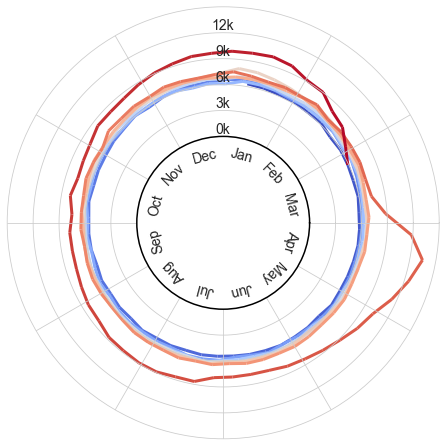

In [70]:
data = df[df['Race/Ethnicity'] == 'Non-Hispanic Black'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 15000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('non-hispanic-black.png')

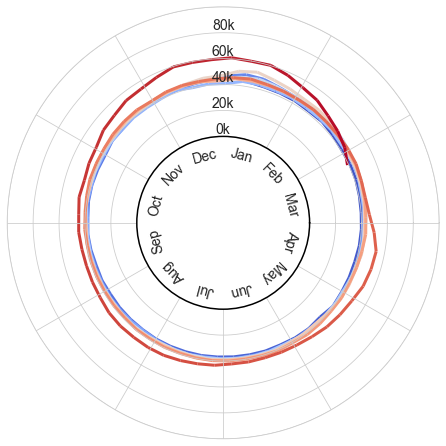

In [77]:
data = df[df['Race/Ethnicity'] == 'Non-Hispanic White'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 100000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('Non-Hispanic White.png')

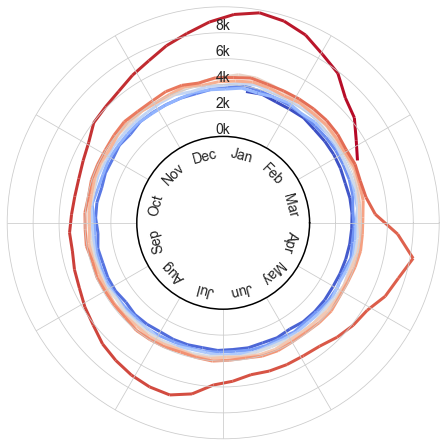

In [80]:
data = df[df['Race/Ethnicity'] == 'Hispanic'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 10000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('Hispanic.png')

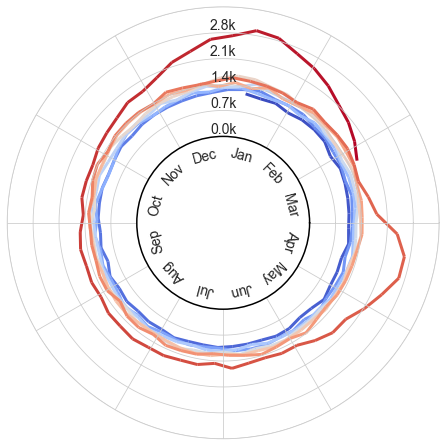

In [96]:
data = df[df['Race/Ethnicity'] == 'Non-Hispanic Asian'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 3500
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str("{:.1f}".format(lab) + 'k'))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('Non-Hispanic Asian.png')

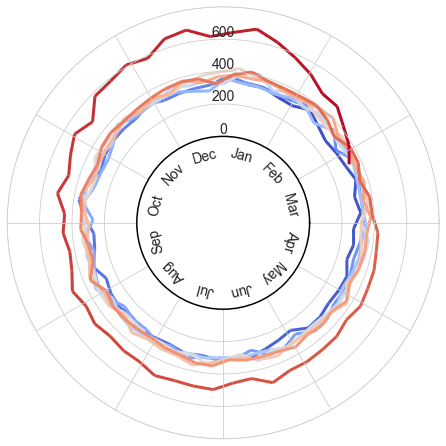

In [104]:
data = df[df['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 800
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/4):
    labels_0.append(str(int(lab)))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/4), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('AIAN.png')

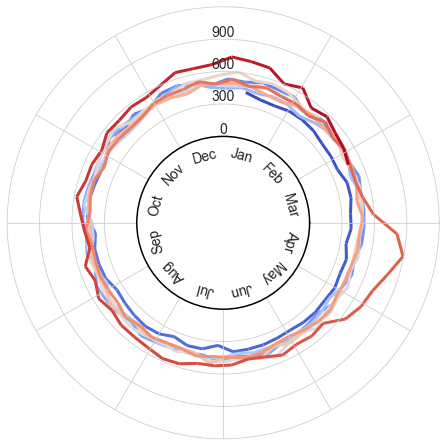

In [108]:
data = df[df['Race/Ethnicity'] == 'Other'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 1200
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/4):
    labels_0.append(str(int(lab)))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/4), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
plt.savefig('other.png')

In [32]:
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Ibis Grad\\Documents\\ffmpeg\\bin\\ffmpeg.exe'

In [18]:
import matplotlib.animation as ani

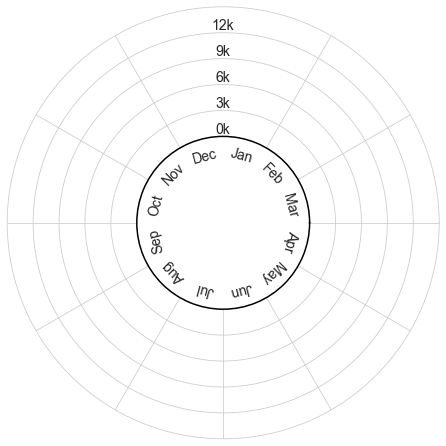

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [307]:
data = df[df['Race/Ethnicity'] == races[5]].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 15000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


def build_line(i=int):
    segments_short = segments[:i]
    lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    lc.set_linewidth(3)
    lc.set_array(f)
    ax.add_collection(lc)

animator = ani.FuncAnimation(fig, build_line, save_count= len(segments), interval = 33)
plt.show()
animator.save('myfirstAnimation.gif')

(0, 10000)

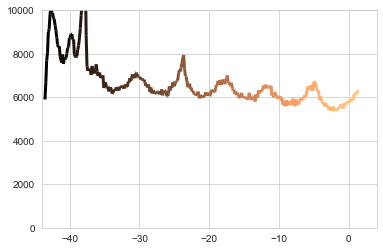

In [150]:
x = f
y = data['Number of Deaths'].values
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('copper'))
lc.set_linewidth(3)
lc.set_array(f)

fig2 = plt.figure()
plt.gca().add_collection(lc)
plt.gca().set_xlim([-44,4])
plt.gca().set_ylim([0,10000])

# Animated

C:\Users\Ibis Grad\anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


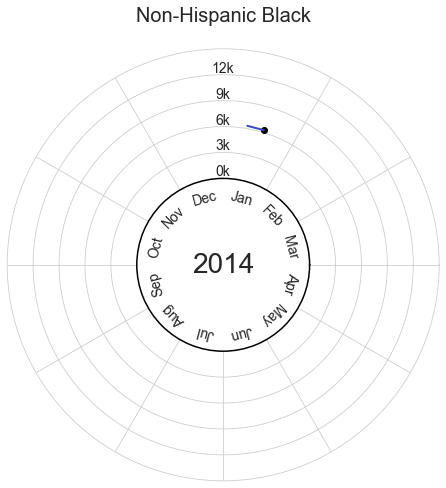

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Wall time: 46 s


In [150]:
%%time

data = df[df['Race/Ethnicity'] == 'Non-Hispanic Black'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 15000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Non-Hispanic Black', fontsize=20)
fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)
plt.show()

#writer = ani.PillowWriter(bitrate=50)
animator.save('non_hispanic_black.gif')

C:\Users\Ibis Grad\anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


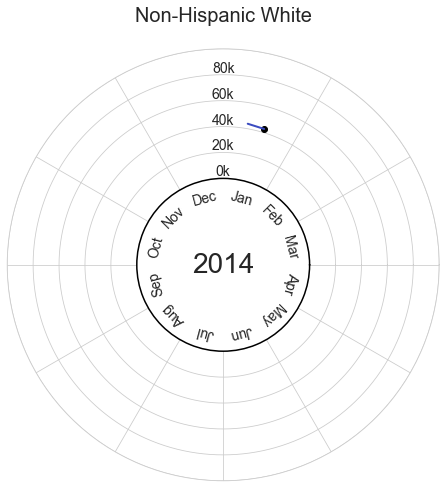

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Wall time: 46.7 s


In [151]:
%%time

data = df[df['Race/Ethnicity'] == 'Non-Hispanic White'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 100000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Non-Hispanic White', fontsize=20)
fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)
plt.show()

#writer = ani.PillowWriter(bitrate=50)
animator.save('non_hispanic_white.gif')

C:\Users\Ibis Grad\anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


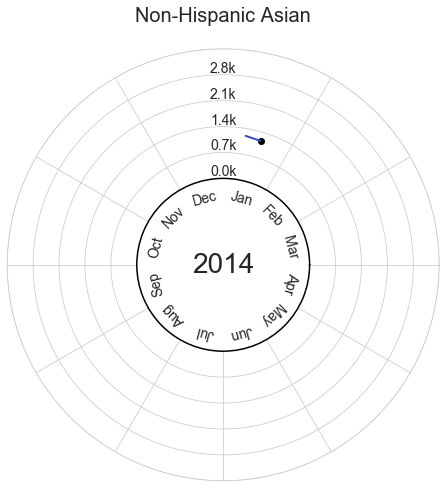

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Wall time: 45.6 s


In [152]:
%%time

data = df[df['Race/Ethnicity'] == 'Non-Hispanic Asian'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 3500
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str("{:.1f}".format(lab) + 'k'))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Non-Hispanic Asian', fontsize=20)
fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)
plt.show()

#writer = ani.PillowWriter(bitrate=50)
animator.save('non_hispanic_asian.gif')

C:\Users\Ibis Grad\anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Wall time: 44 s


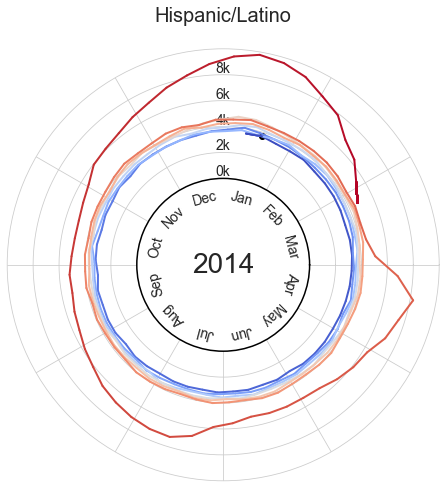

In [153]:
%%time

data = df[df['Race/Ethnicity'] == 'Hispanic'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 10000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Hispanic/Latino', fontsize=20)
fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)

#writer = ani.PillowWriter(bitrate=50)
animator.save('hispanic_latino.gif')

C:\Users\Ibis Grad\anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Wall time: 47.6 s


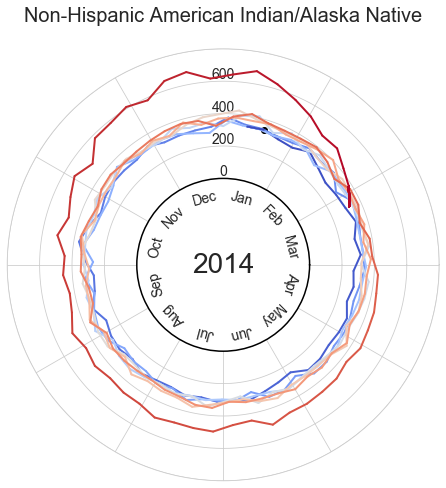

In [154]:
%%time

data = df[df['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 800
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/4):
    labels_0.append(str(int(lab)))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/4), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Non-Hispanic American Indian/Alaska Native', fontsize=20)
fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)

#writer = ani.PillowWriter(bitrate=50)
animator.save('non_hispanic_american_indian_alaska_native.gif')

Wall time: 105 ms


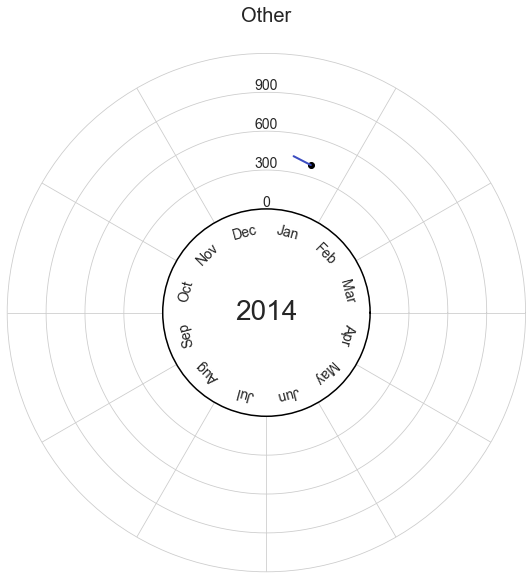

In [158]:
%%time

data = df[df['Race/Ethnicity'] == 'Other'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14


fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 1200
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/4):
    labels_0.append(str(int(lab)))

plt.yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/4), 
           labels=labels_0, fontsize=fontsize, ha='center')
plt.xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2), labels=[])

lc.set_array(f)

#ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x_pos, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x_pos, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

segments_short = segments[0:1]
lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)
text = ax.text(x=0, y=0, s=str(2014), ha='center', fontsize=28, va='center')
mark = plt.scatter(x=x.values[1], y=y.values[1]+bottom, color='k')
#ax.add_collection(lc)
ax.set_title('Other', fontsize=20)
#fig.tight_layout()

def build_line(i=int):
    if int(i) > len(x)-2:
        i = len(x)-2
    #segments_short = segments[:i]
    #lc = mpl.collections.LineCollection(segments_short, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
    #lc.set_linewidth(3)
    #lc.set_array(f)
    #ax.add_collection(lc)
    ax.plot(x[i:i+2], y[i:i+2]+bottom, linewidth=2, color=mpl.cm.coolwarm(i/(len(x)-2)))
    mark.set_offsets([x.values[i+1], y.values[i+1]+bottom])
    text.set_text(str(2014+int((-list(x)[i]+np.pi/2)/(2*np.pi))))
                
animator = ani.FuncAnimation(fig, build_line, save_count=len(x)+90, interval = 33, blit=False)

#writer = ani.PillowWriter(bitrate=50)
#animator.save('other.gif')

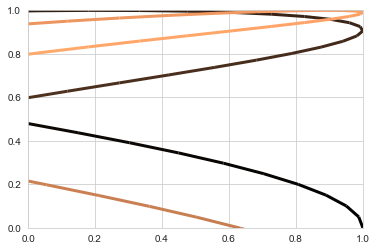

In [142]:
t = np.linspace(0, 10, 200)
x = np.cos(np.pi * t)
y = np.sin(t)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)

fig2 = plt.figure()
plt.gca().add_collection(lc)

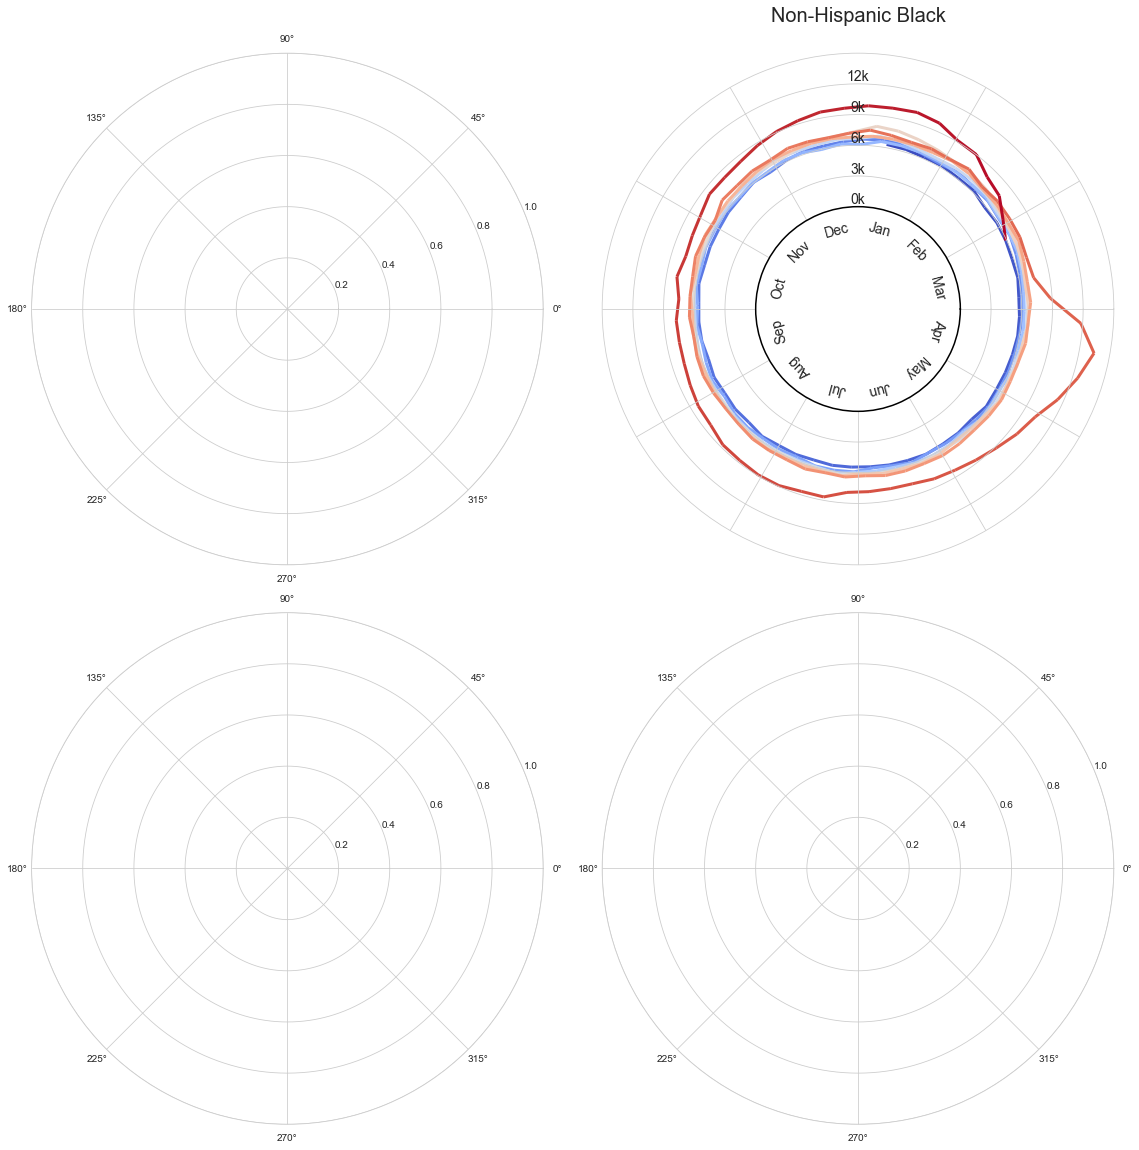

In [128]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(221, polar=True)
ax2 = fig.add_subplot(222, polar=True)
ax3 = fig.add_subplot(223, polar=True)
ax4 = fig.add_subplot(224, polar=True)
ax = ax2
#ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
#ax2 = fig.add_axes([0.6, 0.1, 0.75, 0.75], polar=True)
#ax3 = fig.add_axes([0.6, -0.1, 0.75, 0.75], polar=True)
#plt.savefig('12.png', bbox_inches='tight')
data = df[df['Race/Ethnicity'] == 'Non-Hispanic Black'].sort_values('Week Ending Date')[1:-1]
f = (data['Week Ending Date'] - pd.to_datetime('2014-01-1')).dt.days
f = -f/365*np.pi*2 + np.pi/2
x = f
y = data['Number of Deaths']
fontsize=14

#fig = plt.figure(figsize=(8, 8))
#ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
highest_val_to_display = 15000
bottom = highest_val_to_display/1.5
ax.set_rlabel_position(90)

labels_0 = []
for lab in np.arange(0,highest_val_to_display,highest_val_to_display/5)/1000:
    labels_0.append(str(int(lab)) + 'k')

ax.set_yticks(ticks=np.arange(bottom,highest_val_to_display+bottom,(highest_val_to_display)/5)) 
ax.set_yticklabels(labels=labels_0, fontsize=fontsize, ha='center')
ax.set_xticks(ticks=(np.arange(np.pi*2/12,np.pi*2,np.pi*2/12)+np.pi/2)%(np.pi*2))
ax.set_xticklabels([])
ax.set_title('Non-Hispanic Black', fontsize=20)

points = np.array([x, y+bottom]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments = segments
lc = mpl.collections.LineCollection(segments, cmap=plt.get_cmap('coolwarm_r'), zorder=0)
lc.set_linewidth(3)
lc.set_array(f)

ax.add_collection(lc)
ax.set_rorigin(0)
ax.set_ylim([bottom,highest_val_to_display+bottom])

ax.spines['inner'].set_color('k')
ax.spines['inner'].set_linewidth(1.5)
#ax.spines['polar'].set_visible(False)


total_angle = np.pi*2
delt_months = total_angle/12
open_angle = 0
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months)
rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom*0.8 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=fontsize) 
    
#ax.axes.xaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)
fig.tight_layout()

In [97]:
tck,u     = scipy.interpolate.splprep( [-2*np.pi*day_number/365 + np.pi/2,data['Number of Deaths'].values] ,s = 0 )
xnew,ynew = scipy.interpolate.splev( np.linspace( 0, 1, 10000 ), tck,der = 0)

'figure'

In [92]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(2*x)
ax.scatter(x,y, c=mpl.cm.hot(np.abs(y)), edgecolor='none')

In [82]:
plt.plot(day_number, data['Number of Deaths'].values, c=colors)

ValueError: Invalid RGBA argument: array([[0.0416    , 0.        , 0.        , 1.        ],
       [0.0416    , 0.        , 0.        , 1.        ],
       [0.05189484, 0.        , 0.        , 1.        ],
       ...,
       [1.        , 1.        , 0.96911762, 1.        ],
       [1.        , 1.        , 0.98455881, 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

<Figure size 432x288 with 1 Axes>

In [77]:
(-2*np.pi*day_number/365).shape

(374,)

In [74]:
colors.shape

(374, 4)

In [66]:
len(data['Number of Deaths'].values)

374

In [44]:
races = df['Race/Ethnicity'].value_counts().index

In [38]:
data['Number of Deaths']

50     2064.0
0      3617.0
1      3693.0
2      3513.0
3      3492.0
        ...  
370    6812.0
371    6301.0
372    5411.0
373    4757.0
374    3967.0
Name: Number of Deaths, Length: 376, dtype: float64

In [29]:
day_number = []
for dat in data['Week Ending Date']:
    day_number.append(dat.timetuple().tm_yday)

In [33]:
data.sort_values('Week Ending Date')

Jurisdiction Week Ending Date State Abbreviation  MMWRYear  MMWRWeek  \
50   United States       2014-01-04                 US      2014         1   
0    United States       2014-01-11                 US      2014         2   
1    United States       2014-01-18                 US      2014         3   
2    United States       2014-01-25                 US      2014         4   
3    United States       2014-02-01                 US      2014         5   
..             ...              ...                ...       ...       ...   
370  United States       2021-02-13                 US      2021         6   
371  United States       2021-02-20                 US      2021         7   
372  United States       2021-02-27                 US      2021         8   
373  United States       2021-03-06                 US      2021         9   
374  United States       2021-03-13                 US      2021        10   

    Race/Ethnicity Time Period Suppress  \
50        Hispanic        2014      NaN   
0         Hispanic        2014      NaN   
1         Hispanic        2014      NaN   
2         Hispanic        2014      NaN   
3         Hispanic        2014      NaN   
..             ...         ...      ...   
370       Hispanic        2021      NaN   
371       Hispanic        2021      NaN   
372       Hispanic        2021      NaN   
373       Hispanic        2021      NaN   
374       Hispanic        2021      NaN   

                                                  Note    Outcome  \
50                                                 NaN  All Cause   
0                                                  NaN  All Cause   
1                                                  NaN  All Cause   
2                                                  NaN  All Cause   
3                                                  NaN  All Cause   
..                                                 ...        ...   
370  Data in recent weeks are incomplete. Only 60% ...  All Cause   
371  Data in recent weeks are incomplete. Only 60% ...  All Cause   
372  Data in recent weeks are incomplete. Only 60% ...  All Cause   
373  Data in recent weeks are incomplete. Only 60% ...  All Cause   
374  Data in recent weeks are incomplete. Only 60% ...  All Cause   

     Number of Deaths  Average Number of Deaths in Time Period  \
50             2064.0                                   2064.0   
0              3617.0                                   3617.0   
1              3693.0                                   3693.0   
2              3513.0                                   3513.0   
3              3492.0                                   3492.0   
..                ...                                      ...   
370            6812.0                                   6812.0   
371            6301.0                                   6301.0   
372            5411.0                                   5411.0   
373            4757.0                                   4757.0   
374            3967.0                                   3967.0   

     Difference from 2015-2019 to 2020  \
50                                 NaN   
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
..                                 ...   
370                             2782.0   
371                             2289.0   
372                             1444.0   
373                              835.0   
374                                9.0   

     Percent Difference from 2015-2019 to 2020                  Type  
50                                         NaN  Predicted (weighted)  
0                                          NaN  Predicted (weighted)  
1                                          NaN  Predicted (weighted)  
2                                          NaN  Predicted (weighted)  
3                                          NaN  Predicted (weighted)  

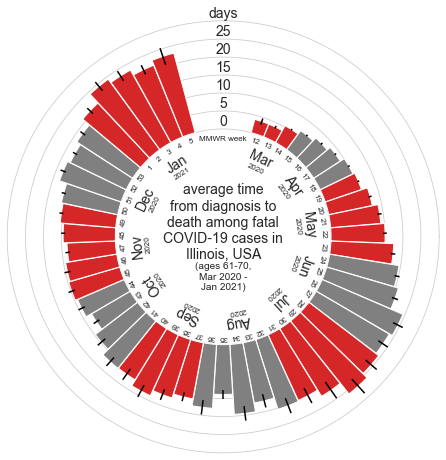

In [55]:
lObjectsALLcnts = mean_death_time#median_death_time

lObjectsALLlbls = idx

color_array = ['gray', sns.color_palette()[3]]
iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)
open_angle = np.pi/6
total_angle = 2*np.pi - open_angle
delt = total_angle/iN
theta=np.arange(0+delt/2+open_angle/2,total_angle+delt/2+open_angle/2,delt)
width = (2*np.pi)/iN *0.9
bottom = 30
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
#bars = ax.bar(-theta+(np.pi/2), arrCnts, width=width, bottom=bottom, 
#              color=[sns.color_palette()[x*3] for x in list(idx.month%2)], 
#             yerr=[arrCnts-df['q25'].values, df['q75'].values-arrCnts])
bars = ax.bar(-theta+(np.pi/2), arrCnts, width=width, bottom=bottom, 
              color=[color_array[x] for x in list(idx.month%2)], 
             yerr=df['std'])

line_2020 = (-theta+(np.pi/2))[6:-6]
#ax.plot(line_2020, [10]*len(line_2020), color='k')
#ax.text(x=(-theta+(np.pi/2))[1], y=10, s='2020', ha='center', va='center', rotation=-30, rotation_mode="anchor", fontsize=14)
#ax.arrow(x=0,y=5, dx=np.pi, dy=0, width=0.015)
ax.set_xticks(theta)
#ax.axis('off')
#ax.yaxis.grid(True)
#ax.xaxis.grid(False)
#ax.xticks(False)
#ax.set_rmax(30)
plt.yticks(ticks=np.arange(bottom,bottom+30,5), labels=np.arange(0,30,5), fontsize=14, ha='center')
ax.set_rlabel_position(90)
ax.text(np.pi/2,bottom+32, 'days', va='center', ha='center', fontsize=14)
ax.text(np.pi/2,bottom-2.75, 'MMWR week', va='center', ha='center', fontsize=8)
ax.text(-np.pi/2,7, 'average time\nfrom diagnosis to\ndeath among fatal\nCOVID-19 cases in\nIllinois, USA', va='bottom', ha='center', fontsize=14)
ax.text(-np.pi/2,7, '(ages 61-70,\nMar 2020 -\nJan 2021)', va='top', ha='center', fontsize=10)
#ax.plot(np.arange(0,np.pi*2, 0.001), np.sin(np.arange(0,np.pi*2, 0.001)*10)+10, linewidth=3, alpha=0.1)
#ax.set_yticks(ticks=np.arange(10,30,5))
#ax.axes.radial_axis.set_visibile(False)

ax.axes.xaxis.set_visible(False)

delt_months = total_angle/11
theta_months=np.arange(0+delt_months/2+open_angle/2, total_angle+delt_months/2+open_angle/2, delt_months-(np.pi/360))
theta_months = total_angle*(np.array([2.5,6.5,10.5,14.5,18.5,23,28,32.5,36.5,41,45.5])-1)/len(idx)+open_angle/2
#lObjectsALLlbls

rotations = np.rad2deg(-theta_months)
#ax.set_ylabel('Radius', rotation=45, size=11)
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
years = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021']
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, months):
    lab = ax.text(x, bottom-6 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=14)   
for x, rotation, label in zip(-theta_months+(np.pi/2), rotations, years):
    lab = ax.text(x, bottom-9 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=8)

delt_weeks = total_angle/len(idx)
theta_weeks=np.arange(0+delt_weeks/2+open_angle/2, total_angle+delt_weeks/2+open_angle/2, delt_weeks)
#theta_months = total_angle*(np.array([2,5.5,10,14.5,18.5,23,28,32.5,36.5,41,45.5])-1)/len(idx)+open_angle/2
#lObjectsALLlbls

rotations = np.rad2deg(-theta_weeks)
#ax.set_ylabel('Radius', rotation=45, size=11)
weeks = list(np.arange(12,54,1))+list(np.arange(1,6,1))
for x, rotation, label in zip(-theta_weeks+(np.pi/2), rotations, weeks):
    lab = ax.text(x, bottom-2 , label, 
             ha='center', va='center', rotation=rotation, rotation_mode="anchor", fontsize=8)  
#plt.show()
plt.savefig('virus_figure_graph_0.pdf', bbox_inches='tight')

In [74]:
np.array([2,5.5,10,14.5,18.5,23,27.5,31.5,36,40.5,45])/len(idx)

array([0.04255319, 0.11702128, 0.21276596, 0.30851064, 0.39361702,
       0.4893617 , 0.58510638, 0.67021277, 0.76595745, 0.86170213,
       0.95744681])

In [119]:
idx

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31'],
              dtype='datetime64[ns]', freq='7D')

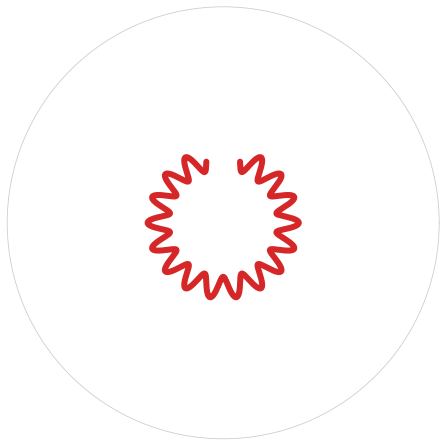

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
lObjectsALLcnts = mean_death_time#median_death_time

lObjectsALLlbls = idx
iN = 400
arrCnts = np.array(lObjectsALLcnts)
open_angle = np.pi/6
total_angle = 2*np.pi - open_angle
delt = total_angle/iN
theta=np.arange(0+delt/2+open_angle/2,total_angle+delt/2+open_angle/2,delt)
#theta=np.arange(0+delt/2+open_angle/2, total_angle-10*delt+open_angle/2, delt)
ax.plot(theta+np.pi/2, -np.cos(theta*18)+6, linewidth=6, alpha=1, color=sns.color_palette()[3])
ax.set_ylim([0,20])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig('virus_rna.pdf', bbox_inches='tight')